In [15]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [16]:
df_heartdisease = pd.read_csv('cleveland-heart-2.csv')
df_heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9,0
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0


In [17]:
#CHECK KIND OF SPECIES

df_heartdisease['num'].unique()

array([0, 1], dtype=int64)

In [18]:
#FEATURES

heartdisease_X = df_heartdisease.drop('num', axis = 1)
heartdisease_X
#drop the last column aka num column into a single column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6


In [19]:
#label, target, groundtruth

heartdisease_y = df_heartdisease['num'] #column y is the last column in dataset with the name num
heartdisease_y

0      0
1      1
2      1
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Name: num, Length: 590, dtype: int64

In [20]:
#SPLIT DATA

#Split data into train set (80%), test set (20%)
#optional

X_train, X_test, y_train, y_test = train_test_split(heartdisease_X, heartdisease_y, test_size = 0.2, random_state = 0) #init parameters
print(X_train.shape) #row 0 to 472 of column 1 - 13
print(X_test.shape) #row 473 to 589 of column 1 - 3
print(y_train.shape) #row 0  to 472 of column num
print(y_test.shape)

(472, 13)
(118, 13)
(472,)
(118,)


In [21]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.76491902,  0.65928026, -0.04757894, ...,  0.73379371,
         1.02007751,  1.20578916],
       [-0.98717938,  0.65928026, -0.04757894, ..., -1.47995233,
        -1.02614682, -1.07930989],
       [-1.86322858,  0.65928026, -1.06836348, ..., -1.47995233,
        -1.02614682, -1.07930989],
       ...,
       [-0.65866093,  0.65928026,  0.9732056 , ..., -1.47995233,
        -1.02614682, -1.07930989],
       [ 1.75047437,  0.65928026,  0.9732056 , ...,  0.73379371,
         1.22469995,  0.6345144 ],
       [ 0.32689442, -1.51680562, -1.06836348, ...,  0.53254407,
        -1.02614682, -1.07930989]])

In [22]:
def plot_decision_regions(X, y, classifier, resolution=0.2):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            c=cmap(idx),
            edgecolor='black',
            marker=markers[idx],
            label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


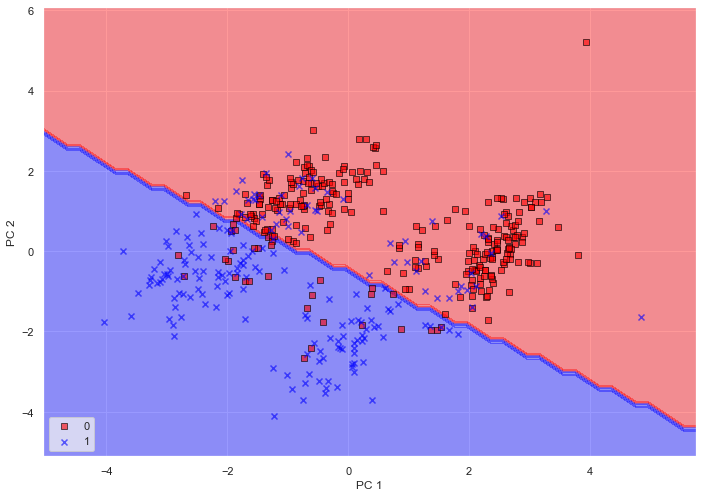

In [23]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


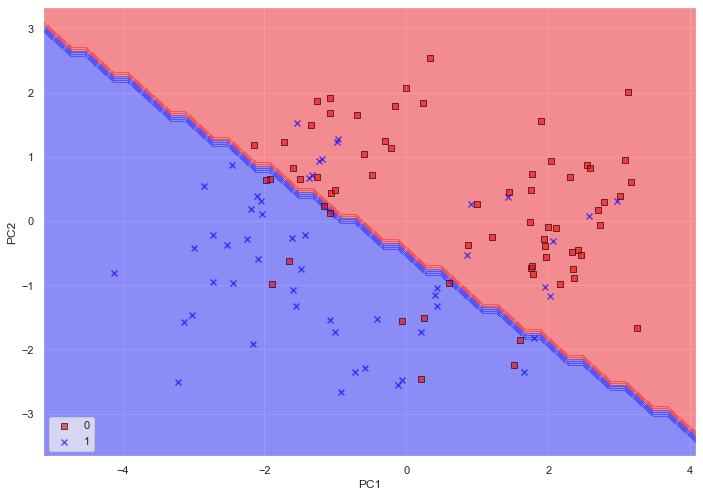

In [24]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.25833259, 0.14491561])

## Choosing the Right Number of Dimensions

In [26]:
pca = PCA()
pca.fit(X_train_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [27]:
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [28]:
pca.explained_variance_ratio_

array([0.25833259, 0.14491561, 0.09428722, 0.08133217, 0.07951131,
       0.06601828, 0.06340648, 0.06067675, 0.05541539, 0.03781045,
       0.02871719])